# Xception model  

# Imports:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from keras.models import load_model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models

# Generators:

In [15]:
# Load images using keras ImageDataGenerator class

n_classes = 101
batch_size = 16
width, height = 200, 200
train_data = './food-101/train'
test_data = './food-101/test'
train_samples = 75750
test_samples = 25250

train_data_gen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1. / 255)

train_gen = train_data_gen.flow_from_directory(train_data, 
                                               target_size=(height, width), 
                                               batch_size=batch_size, 
                                               class_mode='categorical',
                                             shuffle=True)

test_gen = test_data_gen.flow_from_directory(test_data, 
                                             target_size=(height, width),
                                             batch_size=batch_size, 
                                             class_mode='categorical',
                                            shuffle=True)


Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


# Model:

In [16]:

#input shape
inputs = keras.Input(shape=(200, 200, 3))

#covolutional layer

xception = Xception( weights='imagenet', include_top=False,input_shape=(200, 200, 3))
xception.trainable = False
base = xception(inputs, training=False)

#reduce the size of the feature map
vectors = keras.layers.GlobalAveragePooling2D()(base)

#inner dense layer
inner = keras.layers.Dense(128, activation='relu')(vectors)

#dropout
layer = Dropout(0.2)(inner)

#outer dense layer 
predictions = keras.layers.Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(layer)

#model   
model = keras.Model(inputs = inputs, outputs=predictions)

#compile model
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='best_model_101class_xception.hdf5', save_best_only=True)
csv_logger = CSVLogger('history_101class_xception.log')  

    
   

In [18]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 101)               13029     
                                                           

# Training:

In [17]:
history_101class = model.fit(train_gen, 
                             steps_per_epoch= train_samples // batch_size, 
                             validation_data= test_gen, 
                             validation_steps= test_samples // batch_size, 
                             epochs=10, callbacks=[csv_logger, checkpointer])

model.save('model_trained_101class_xception.hdf5')

Epoch 1/10
4734/4734 [==============================] - ETA: 0s - loss: 5.0312 - accuracy: 0.0465

/Users/macbookpro/opt/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4734/4734 [==============================] - 4950s 1s/step - loss: 5.0312 - accuracy: 0.0465 - val_loss: 4.7587 - val_accuracy: 0.1386
Epoch 2/10
4734/4734 [==============================] - 4747s 1s/step - loss: 4.5847 - accuracy: 0.1363 - val_loss: 4.1888 - val_accuracy: 0.2498
Epoch 3/10
4734/4734 [==============================] - 7340s 2s/step - loss: 4.1481 - accuracy: 0.1984 - val_loss: 3.7281 - val_accuracy: 0.3106
Epoch 4/10
4734/4734 [==============================] - 7243s 2s/step - loss: 3.8259 - accuracy: 0.2385 - val_loss: 3.4093 - val_accuracy: 0.3597
Epoch 5/10
4734/4734 [==============================] - 7214s 2s/step - loss: 3.5986 - accuracy: 0.2709 - val_loss: 3.1927 - val_accuracy: 0.3846
Epoch 6/10
4734/4734 [==============================] - 7289s 2s/step - loss: 3.4407 - accuracy: 0.2914 - val_loss: 3.0375 - val_accuracy: 0.3997
Epoch 7/10
4734/4734 [==============================] - 8078s 2s/step - loss: 3.3108 - accuracy: 0.3120 - val_loss: 2.9181 - val_accura

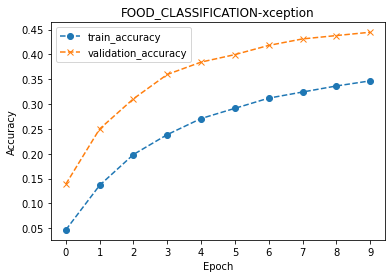

In [26]:
_ = plt.style.library['seaborn-darkgrid']
_ = plt.title('FOOD_CLASSIFICATION-xception')
_ = plt.plot(history_101class.history['accuracy'], marker='o', linestyle='dashed')
_ = plt.plot(history_101class.history['val_accuracy'], marker='x', linestyle='dashed')
_ = plt.ylabel('Accuracy')
_ = plt.xlabel('Epoch')
_ = plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
plt.xticks(np.arange(10))
plt.show()

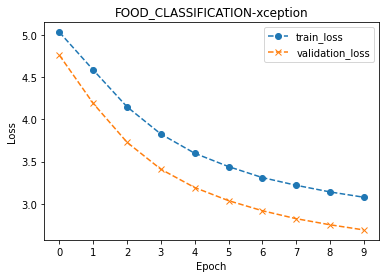

In [27]:
# Plot training-loss & validation-loss.
_ = plt.style.library['seaborn-darkgrid']
_ = plt.title('FOOD_CLASSIFICATION-xception')
_ = plt.plot(history_101class.history['loss'], marker='o', linestyle='dashed')
_ = plt.plot(history_101class.history['val_loss'], marker='x', linestyle='dashed')
_ = plt.ylabel('Loss')
_ = plt.xlabel('Epoch')
_ = plt.legend(['train_loss', 'validation_loss'], loc='best')
plt.xticks(np.arange(10))
plt.show()

In [45]:
model = load_model('best_model_101class_xception.hdf5',compile = False)

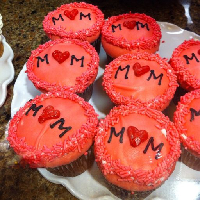

In [46]:
img = load_img('cupcakes.jpg', target_size=(200, 200))
img

In [47]:
from tensorflow.keras.applications.xception import preprocess_input

In [48]:
# convert image in to array
x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

In [49]:
X.shape

(1, 200, 200, 3)

In [50]:
preds = model.predict(X)
preds

array([[1.29762953e-02, 2.34675957e-04, 2.91665108e-03, 1.95029425e-03,
        9.33368411e-03, 6.44024462e-04, 4.19430342e-03, 6.41488587e-04,
        6.65251352e-03, 6.12681499e-04, 1.65213773e-03, 3.42111714e-04,
        7.20987469e-03, 3.88595765e-03, 5.58371842e-03, 1.82568457e-03,
        2.04751175e-03, 7.86075089e-03, 5.41764137e-04, 5.36040519e-04,
        9.72428476e-04, 8.42839759e-03, 1.06985215e-02, 2.31020129e-03,
        9.48570902e-04, 2.91924598e-03, 4.61930316e-03, 2.71753035e-03,
        6.36251923e-03, 4.41272080e-01, 8.61629844e-03, 1.56949177e-01,
        3.18694394e-03, 1.27726118e-03, 6.00993633e-03, 1.32853363e-03,
        9.46367439e-03, 6.86175947e-04, 6.19916013e-04, 4.82591987e-03,
        1.70854188e-03, 5.60524582e-04, 1.57560606e-03, 3.83679522e-04,
        2.06224548e-04, 4.68629133e-03, 1.37416448e-03, 5.24639792e-04,
        8.17085907e-04, 2.46477174e-03, 6.07815280e-04, 6.64177176e-04,
        6.22132793e-04, 1.90059524e-02, 2.62103626e-04, 5.598691

In [51]:
classes = ['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes','deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog','huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster_roll_sandwich',
 'macaroni_and_cheese',
 'macarons',
 'miso_soup',
 'mussels',
 'nachos',
 'omelette',
 'onion_rings',
 'oysters',
 'pad_thai',
 'paella',
 'pancakes',
 'panna_cotta',
 'peking_duck',
 'pho',
 'pizza',
 'pork_chop',
 'poutine',
 'prime_rib',
 'pulled_pork_sandwich',
 'ramen',
 'ravioli',
 'red_velvet_cake',
 'risotto',
 'samosa',
 'sashimi',
 'scallops',
 'seaweed_salad',
 'shrimp_and_grits',
 'spaghetti_bolognese',
 'spaghetti_carbonara',
 'spring_rolls',
 'steak',
 'strawberry_shortcake',
 'sushi',
 'tacos',
 'takoyaki',
 'tiramisu',
 'tuna_tartare',
 'waffles']

In [52]:
dict(zip(classes, preds[0]))

{'apple_pie': 0.012976295,
 'baby_back_ribs': 0.00023467596,
 'baklava': 0.002916651,
 'beef_carpaccio': 0.0019502942,
 'beef_tartare': 0.009333684,
 'beet_salad': 0.00064402446,
 'beignets': 0.0041943034,
 'bibimbap': 0.0006414886,
 'bread_pudding': 0.0066525135,
 'breakfast_burrito': 0.0006126815,
 'bruschetta': 0.0016521377,
 'caesar_salad': 0.0003421117,
 'cannoli': 0.0072098747,
 'caprese_salad': 0.0038859576,
 'carrot_cake': 0.0055837184,
 'ceviche': 0.0018256846,
 'cheese_plate': 0.0020475117,
 'cheesecake': 0.007860751,
 'chicken_curry': 0.00054176414,
 'chicken_quesadilla': 0.0005360405,
 'chicken_wings': 0.0009724285,
 'chocolate_cake': 0.008428398,
 'chocolate_mousse': 0.0106985215,
 'churros': 0.0023102013,
 'clam_chowder': 0.0009485709,
 'club_sandwich': 0.002919246,
 'crab_cakes': 0.004619303,
 'creme_brulee': 0.0027175304,
 'croque_madame': 0.006362519,
 'cup_cakes': 0.44127208,
 'deviled_eggs': 0.008616298,
 'donuts': 0.15694918,
 'dumplings': 0.003186944,
 'edamame': 0

In [53]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

#save the model
with open('Best_restaurant_to_serve.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

2021-12-14 13:29:36.130218: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/5s/020k6xms3yn8kwdq_4y_8zl00000gn/T/tmppn6a9ksc/assets


2021-12-14 13:35:08.458725: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2021-12-14 13:35:08.458768: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2021-12-14 13:35:08.478461: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/5s/020k6xms3yn8kwdq_4y_8zl00000gn/T/tmppn6a9ksc
2021-12-14 13:35:08.704163: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2021-12-14 13:35:08.704188: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /var/folders/5s/020k6xms3yn8kwdq_4y_8zl00000gn/T/tmppn6a9ksc
2021-12-14 13:35:09.818548: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2021-12-14 13:35:13.498138: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /var/folders/5s/020k6xms3yn8kwdq_4y_8zl00000gn/T/tmppn6a9ksc
2021-12